In [155]:

import warnings
warnings.filterwarnings('ignore')

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import calendar
from sklearn.model_selection import train_test_split
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [157]:
#Read the bike data to a Pandas

bike_info = pd.read_csv("day.csv")
bike_info.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [158]:
bike_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [159]:
# Check for NULL values in the dataframe
bike_info.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inference:  
  The dataset seems to be clean as there are no NULL values

In [160]:
bike_info.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [161]:
# Finding the number of rows and columns of the dataset
bike_info.shape

(730, 16)

In [162]:
# check whether any duplicate keys are present in the dataset.
bike_info['instant'].nunique()

730

In [163]:
# Casual and Registered variables are not needed in the dataset to analyse as the sum of 
# these values are already present in cnt variable.
bike_info.drop(['casual', 'registered','dteday','instant'], inplace=True, axis = 1)

In [164]:
bike_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [165]:
# Mapping the variables in season column to its corresponding values
bike_info["season"] = bike_info["season"].map({1: 'spring',2:'summer',3:'fall',4:'winter'})

In [166]:
bike_info["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [167]:
bike_info["season"].nunique()

4

In [168]:
# Mapping the variables in Month column to its corresponding values using Calendar python 
# utility and taking only the first 3 characters
bike_info["mnth"] = bike_info["mnth"].apply(lambda x: calendar.month_name[x][0:3])

In [169]:
bike_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [170]:
bike_info["mnth"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [171]:
# Mapping the variables in weathersit column to its corresponding values based on the data dictionary files
bike_info["weathersit"] = bike_info["weathersit"].map({1:'clear',2:'mist_cloud', 3:'light_rain', 4:'heavy_rain'})

In [172]:
bike_info["weathersit"].unique()

array(['mist_cloud', 'clear', 'light_rain'], dtype=object)

In [173]:
# Converting the weekday information from 0 to 7 to their literal day values
# As discussed in the class, 0 correponds to Tuesday a, 1 wednesday and so on
bike_info["weekday"] = bike_info["weekday"].map({5:'sun',6:'mon',0:'tue',1:'wed',2:'thu',3:'fri',4:'sat'})

In [174]:
bike_info["weekday"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype=object)

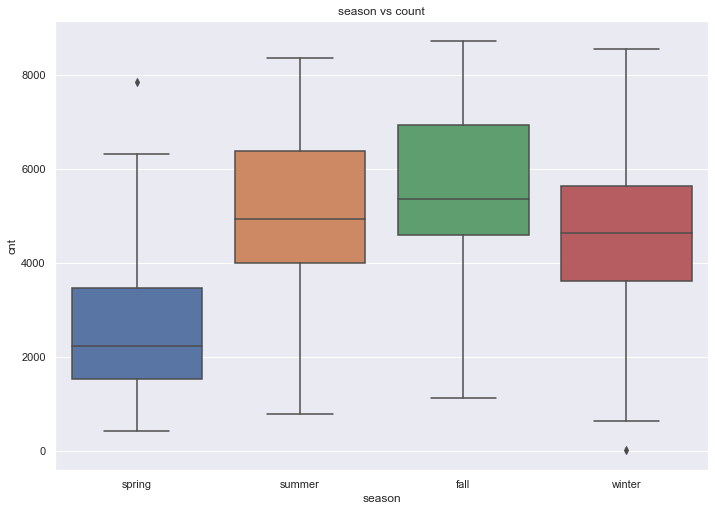

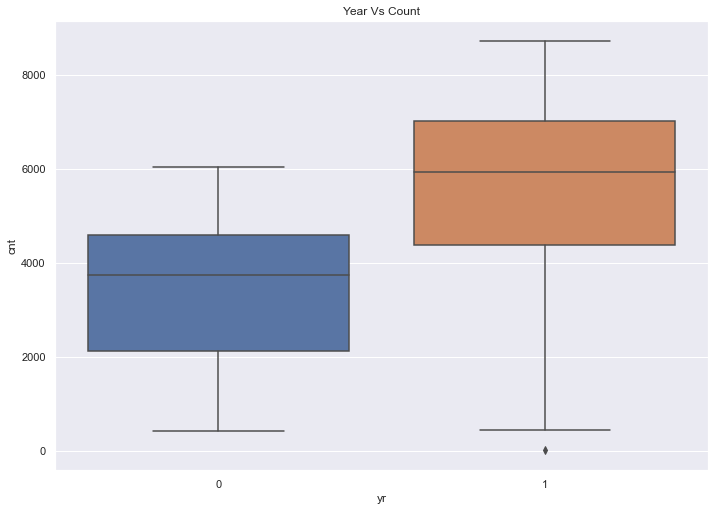

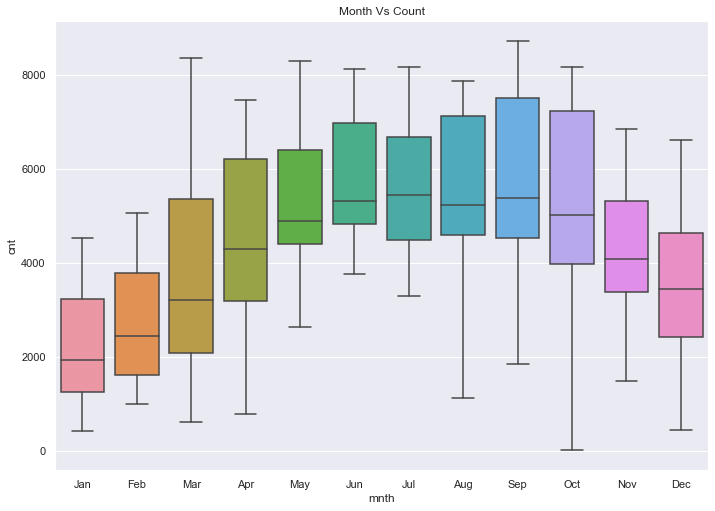

In [175]:
# Drawing Box plots for season, year and Month variables against the variable cnt
ax = sns.boxplot(data=bike_info, x="season", y='cnt')
plt.title("season vs count")
plt.show()
    
sns.boxplot(data=bike_info, x="yr", y='cnt')
plt.title("Year Vs Count")
plt.show()

sns.boxplot(data=bike_info, x="mnth", y='cnt')
plt.title("Month Vs Count")
plt.show()



#### Inference:
   - Bike demand is higher during the months August, September and October.
   - Bike demand has increased significantly during 2019
   - Demand is high during the fall and low during spring

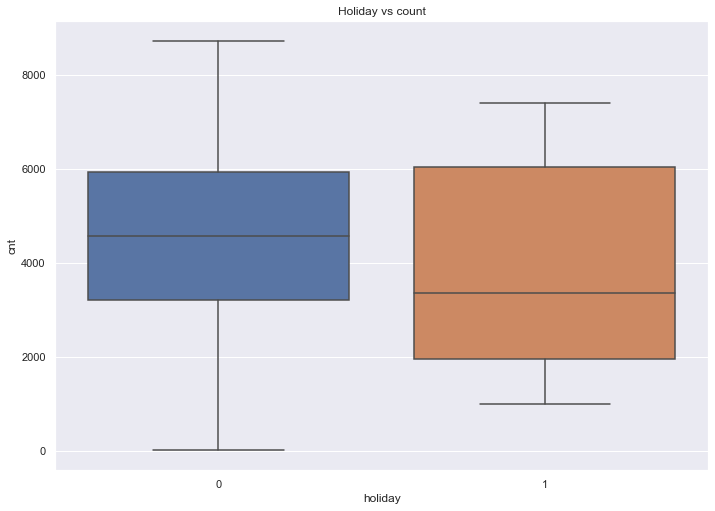

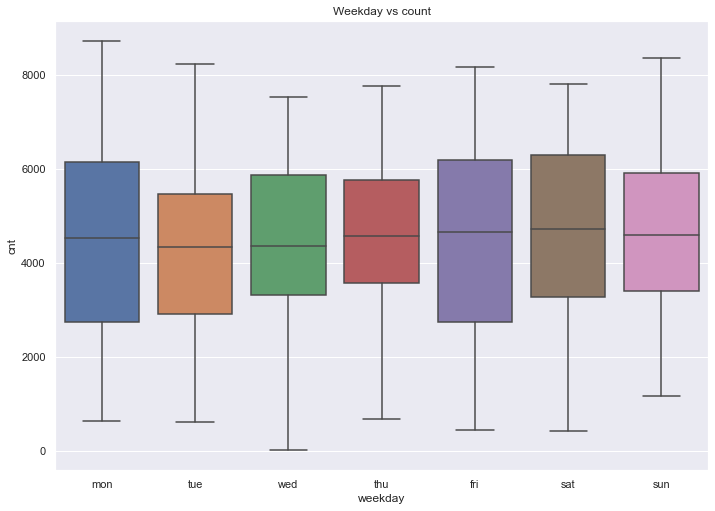

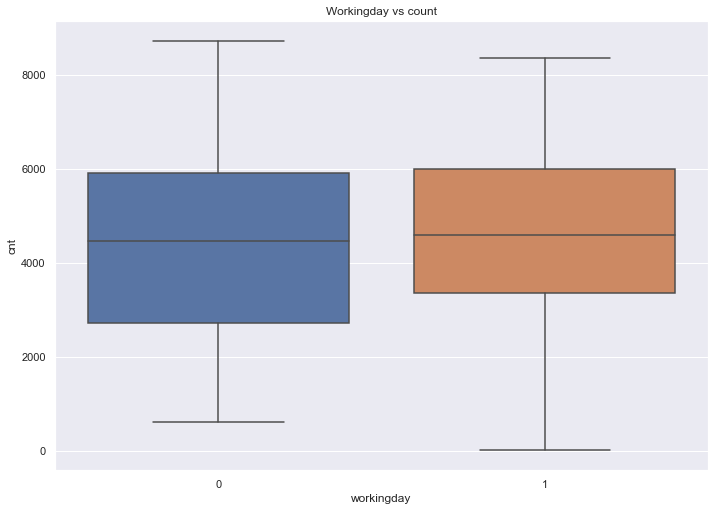

In [176]:
# Drawing Box plots for holiday, weekday and workingday variables against the variable cnt
sns.boxplot(data=bike_info, x="holiday", y='cnt')
plt.title("Holiday vs count")
plt.show()

sns.boxplot(data=bike_info, x="weekday", y='cnt')
plt.title("Weekday vs count")
plt.show()

sns.boxplot(data=bike_info, x="workingday", y='cnt')
plt.title("Workingday vs count")
plt.show()


#### inference: 
    There is no significant difference in the bike demand between working and weekday
    The median  number of people looking for bikes is higher on holidays
    There is no significant difference on median number of people booking the bike throughtout the week
    

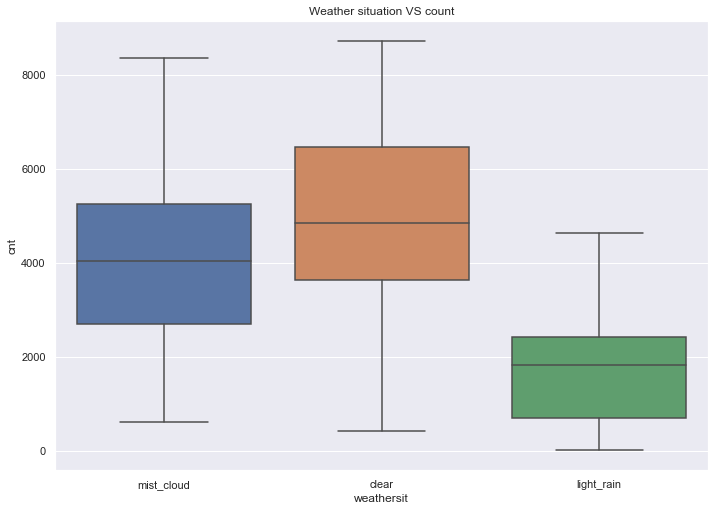

In [177]:
sns.boxplot(data=bike_info, x=bike_info["weathersit"], y='cnt')
plt.title("Weather situation VS count")
plt.show()

#### Inference:
  - There is literally no demand for bikes during heavy rain.
  - The demand for the bike is highest during clear weather
  - The demand drops drastically when there is a light rain

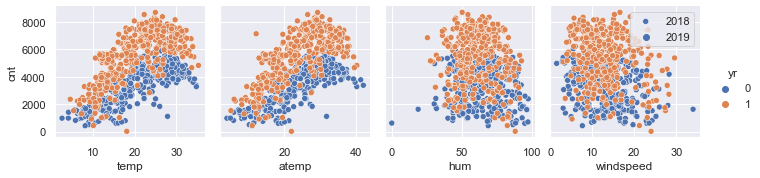

In [183]:
#Doing a pairplot between the numerical variables and cnt
x_vars = ['temp', 'atemp', 'hum', 'windspeed']
target = ['cnt']
sns.pairplot(bike_info, x_vars=x_vars, y_vars=target , hue='yr' )
plt.legend(labels=['2018', '2019'])
plt.show()

#### Inference:
   -  There is a linear relationship between temparature, atemparature with bike demand

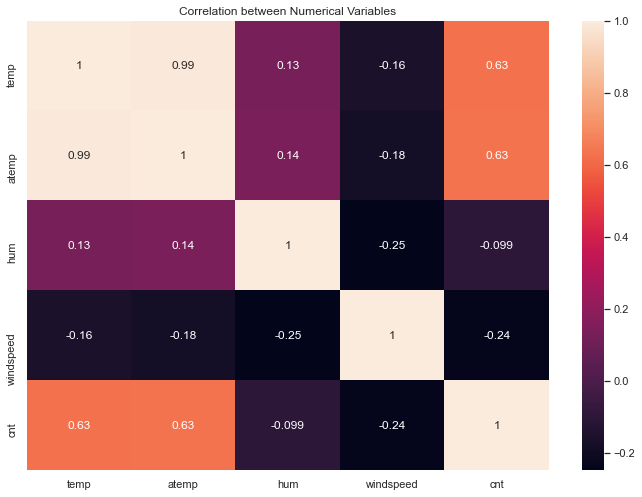

In [184]:
# Building a heatmap to find the corelation coefficient between the numerical variables
sns.heatmap(bike_info[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

There is a strong linear relationship between temp and atemp. We can use only one of those variables. We will decide which one to use in the subsequent steps


In [185]:
# Creating dummy variables for season and dropping one of the variable  (as having all 
# the dummy variable will lead to multi collinearity)
season = pd.get_dummies(bike_info['season'], drop_first = True)

# Concatenating season dummy variable with the bike information dataset.
bike_info = pd.concat([bike_info, season], axis = 1)

# dropping the season variable from the dataset as the dummy variables will explain the season
bike_info.drop(['season'], axis = 1, inplace = True)


In [186]:
bike_info.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,mon,0,mist_cloud,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,tue,0,mist_cloud,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [187]:
# Creating dummy variables for weekday and dropping one of the variable  (as having all 
# the dummy variable will lead to multi collinearity)
weekday = pd.get_dummies(bike_info['weekday'], drop_first = True)

# Concatenating weekday dummy variable with the bike information dataset.
bike_info = pd.concat([bike_info, weekday], axis = 1)

# dropping the weekday variable from the dataset as the dummy variables will explain the weekday
bike_info.drop(['weekday'], axis = 1, inplace = True)

In [188]:
bike_info.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,0,Jan,0,0,mist_cloud,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0
1,0,Jan,0,0,mist_cloud,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0
2,0,Jan,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,0,Jan,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,0,Jan,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0


In [189]:
# Creating dummy variables for weathersit and dropping one of the variable  (as having all 
# the dummy variable will lead to multi collinearity)

weathersit = pd.get_dummies(bike_info['weathersit'], drop_first = True)

# Concatenating weathersit dummy variable with the bike information dataset.
bike_info = pd.concat([bike_info, weathersit], axis = 1)

# dropping the weathersit variable from the dataset as the dummy variables will explain the weathersit
bike_info.drop(['weathersit'], axis = 1, inplace = True)
bike_info.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,light_rain,mist_cloud
0,0,Jan,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,1
1,0,Jan,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,1
2,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0
3,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0
4,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0


In [190]:
# Creating dummy variables for mnth and dropping one of the variable  (as having all 
# the dummy variable will lead to multi collinearity)

mnth = pd.get_dummies(bike_info['mnth'], drop_first = True)

# Concatenating mnth dummy variable with the bike information dataset.
bike_info = pd.concat([bike_info, mnth], axis = 1)

# dropping the mnth variable from the dataset as the dummy variables will explain the mnth
bike_info.drop(['mnth'], axis = 1, inplace = True)
bike_info.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,light_rain,mist_cloud,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [191]:

bike_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  mon         730 non-null    uint8  
 12  sat         730 non-null    uint8  
 13  sun         730 non-null    uint8  
 14  thu         730 non-null    uint8  
 15  tue         730 non-null    uint8  
 16  wed         730 non-null    uint8  
 17  light_rain  730 non-null    uint8  
 18  mist_cloud  730 non-null    uint8  
 19  Aug         730 non-null    u

In [192]:
# Splitting the bike information between training and test set.70% of the data is 
# for training and the 30% is for testing. The random state is 100 as it should return the same data everytime.

df_train, df_test = train_test_split(bike_info, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [193]:
# Displaying all the columns to easily verify the needed ones
pd.set_option('display.max_columns', None)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,light_rain,mist_cloud,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [194]:
# Consider all the numerical variables and try to fit and transform inorder to scale the same within a range
scaler = MinMaxScaler()
np.random.seed(0)
num_vars = ['cnt','temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
y_train = df_train.pop('cnt')
X_train = df_train

In [195]:
# Finding 15 variables using Recursive Factor elimination from the initial 30 variables
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [196]:
#Finding the list of columns selected by algorithm and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', True, 1),
 ('sat', False, 14),
 ('sun', False, 11),
 ('thu', False, 10),
 ('tue', False, 8),
 ('wed', False, 9),
 ('light_rain', True, 1),
 ('mist_cloud', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [197]:
#Taking all the columns after performing RFE
col = X_train.columns[rfe.support_]

In [198]:
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'mon', 'light_rain', 'mist_cloud', 'Jan', 'Jul',
       'Sep'],
      dtype='object')


In [199]:
#Restricting X_train variables only to the columns selected from the RFE
X_train = X_train[col]

In [200]:
#This function will calculate Variance Inflation factor
def calculate_vif(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif;

In [201]:
# We will use stats models API. Since stats model doesnot have a y intercept with it, 
# we will add a constant manually to the API and call OLS to get the model.
X_train_rfe = X_train[col]
X_train_rfe1 = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe1).fit()
lr.params

const         0.251893
yr            0.230527
holiday      -0.058173
workingday    0.043335
temp          0.509619
hum          -0.156299
windspeed    -0.186259
spring       -0.050897
summer        0.050762
winter        0.093301
mon           0.053552
light_rain   -0.247464
mist_cloud   -0.056318
Jan          -0.034512
Jul          -0.052918
Sep           0.081395
dtype: float64

In [202]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          4.22e-191
Time:                        07:12:53   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer         0.0508      0.015      3.423      0.001       0.022       0.080
winter         0.0933      0.017      5.403      0.000       0.059       0.127
mon            0.0536      0.014      3.694      0.000       0.025       0.082
light_rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
mist_cloud    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep            0.0814      0.016      4.945      0.000       0.049       0.114
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
#Calculate VIF for the variables
calculate_vif(X_train_rfe)


,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
11,mist_cloud,2.29
0,yr,2.09
9,mon,1.98


#### Assumption:
- We will reject variables that have p value greater than 0.04
- We will reject variables that have VIF values greater than 5
  

#### Inference:
    The p value of Jan is 0.047 which is greater than the threshold we have set as 0.04
     We will remove Jan and run the regression again
    

In [204]:
# We can drop Jan as it has high p value
X_train_rfe = X_train_rfe.drop(['Jan'], axis = 1)
X_train_rfe1 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_rfe1).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          2.11e-191
Time:                        07:12:55   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.000       0.170       0.310
yr             0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday     0.0430      0.012      3.725      0.000       0.020       0.066
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
mon            0.0530      0.015      3.648      0.000       0.024       0.082
light_rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
mist_cloud    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
Jul           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep            0.0820      0.017      4.966      0.000       0.050       0.114
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
calculate_vif(X_train_rfe)

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.42
7,summer,2.85
11,mist_cloud,2.29
0,yr,2.08
9,mon,1.97


#### Inference:
  p values of all the variables is less than 0.04. Hence we look at VIF to find any variables that has greater than 5.
  As shown in the table above, humidity has VIF greater than 5. We will start by removing it

In [206]:
# Removing humidity from the dataset and running the model again
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)
X_train_rfe2 = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_rfe2).fit()
X_train_rfe2.info()
lr3.summary()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   temp        510 non-null    float64
 5   windspeed   510 non-null    float64
 6   spring      510 non-null    uint8  
 7   summer      510 non-null    uint8  
 8   winter      510 non-null    uint8  
 9   mon         510 non-null    uint8  
 10  light_rain  510 non-null    uint8  
 11  mist_cloud  510 non-null    uint8  
 12  Jul         510 non-null    uint8  
 13  Sep         510 non-null    uint8  
dtypes: float64(3), int64(3), uint8(8)
memory usage: 31.9 KB


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.28e-188
Time:                        07:12:56   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.031      5.126      0.000       0.097       0.218
yr             0.2337      0.008     28.828      0.000       0.218       0.250
holiday       -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday     0.0461      0.012      3.931      0.000       0.023       0.069
temp           0.4915      0.033     15.027      0.000       0.427       0.556
windspeed     -0.1491      0.025     -6.024      0.000      -0.198      -0.100
spring        -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer         0.0477      0.015      3.180      0.002       0.018       0.077
winter         0.0846      0.017      4.971      0.000       0.051       0.118
mon            0.0579      0.015      3.924      0.000       0.029       0.087
light_rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
mist_cloud    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
Jul           -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep            0.0759      0.017      4.537      0.000       0.043       0.109
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
calculate_vif(X_train_rfe)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.34
0,yr,2.07
7,winter,1.98
8,mon,1.96
11,Jul,1.58
10,mist_cloud,1.57


#### Inference :
   None of the variables are having p values greater than 0.04
   However, p values of temp is higher than 5, we can drop the same.

In [208]:
# Removing Temparature from the dataset and building the model again
X_train_rfe = X_train_rfe.drop(['temp'], axis = 1)
X_train_rfe3 = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_rfe3).fit()


In [209]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.68e-149
Time:                        07:12:56   Log-Likelihood:                 412.53
No. Observations:                 510   AIC:                            -799.1
Df Residuals:                     497   BIC:                            -744.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5417      0.021     26.338      0.000       0.501       0.582
yr             0.2473      0.010     25.463      0.000       0.228       0.266
holiday       -0.0595      0.033     -1.799      0.073      -0.124       0.005
workingday     0.0473      0.014      3.346      0.001       0.020       0.075
windspeed     -0.1713      0.030     -5.753      0.000      -0.230      -0.113
spring        -0.2989      0.017    -17.903      0.000      -0.332      -0.266
summer        -0.0438      0.017     -2.654      0.008      -0.076      -0.011
winter        -0.0765      0.016     -4.802      0.000      -0.108      -0.045
mon            0.0548      0.018      3.084      0.002       0.020       0.090
light_rain    -0.3012      0.029    -10.262      0.000      -0.359      -0.244
mist_cloud    -0.0915      0.010     -8.813      0.000      -0.112      -0.071
Jul           -0.0101      0.022     -0.460      0.646      -0.053       0.033
Sep            0.0718      0.020      3.561      0.000       0.032       0.111
==============================================================================
Omnibus:                       28.560   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.864
Skew:                          -0.321   Prob(JB):                     1.65e-13
Kurtosis:                       4.536   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:


calculate_vif(X_train_rfe)

,Features,VIF
3,windspeed,4.22
2,workingday,3.82
4,spring,2.31
5,summer,2.29
6,winter,1.98
0,yr,1.91
7,mon,1.69
9,mist_cloud,1.56
10,Jul,1.30
11,Sep,1.25


#### Inference: 
   The p value of july is very high. Hence dropping the same and rebuilding the model

In [211]:
# Removing July from the training set and regenrating the model again
X_train_rfe = X_train_rfe.drop(['Jul'], axis = 1)
X_train_rfe4 = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_rfe4).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.48e-150
Time:                        07:12:57   Log-Likelihood:                 412.43
No. Observations:                 510   AIC:                            -800.9
Df Residuals:                     498   BIC:                            -750.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5378      0.019     28.793      0.000       0.501       0.574
yr             0.2473      0.010     25.488      0.000       0.228       0.266
holiday       -0.0590      0.033     -1.788      0.074      -0.124       0.006
workingday     0.0476      0.014      3.369      0.001       0.020       0.075
windspeed     -0.1712      0.030     -5.754      0.000      -0.230      -0.113
spring        -0.2954      0.015    -20.003      0.000      -0.324      -0.266
summer        -0.0403      0.015     -2.765      0.006      -0.069      -0.012
winter        -0.0731      0.014     -5.181      0.000      -0.101      -0.045
mon            0.0550      0.018      3.095      0.002       0.020       0.090
light_rain    -0.3014      0.029    -10.275      0.000      -0.359      -0.244
mist_cloud    -0.0912      0.010     -8.809      0.000      -0.111      -0.071
Sep            0.0746      0.019      3.886      0.000       0.037       0.112
==============================================================================
Omnibus:                       28.638   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.714
Skew:                          -0.324   Prob(JB):                     1.78e-13
Kurtosis:                       4.531   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
vif = calculate_vif(X_train_rfe)
vif

,Features,VIF
3,windspeed,4.07
2,workingday,3.53
4,spring,2.04
5,summer,2.01
0,yr,1.89
6,winter,1.77
7,mon,1.62
9,mist_cloud,1.56
10,Sep,1.20
1,holiday,1.13


#### Inference :
   - We will remove holiday next as the pv alue is 0.07 which is greater than our assumption 0.04.
   

In [213]:
# Removing July from the training set and regenrating the model again
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)
X_train_rfe5 = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train, X_train_rfe5).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          5.49e-151
Time:                        07:12:58   Log-Likelihood:                 410.80
No. Observations:                 510   AIC:                            -799.6
Df Residuals:                     499   BIC:                            -753.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5299      0.018     29.127      0.000       0.494       0.566
yr             0.2475      0.010     25.453      0.000       0.228       0.267
workingday     0.0563      0.013      4.240      0.000       0.030       0.082
windspeed     -0.1721      0.030     -5.774      0.000      -0.231      -0.114
spring        -0.2969      0.015    -20.102      0.000      -0.326      -0.268
summer        -0.0403      0.015     -2.764      0.006      -0.069      -0.012
winter        -0.0744      0.014     -5.272      0.000      -0.102      -0.047
mon            0.0638      0.017      3.733      0.000       0.030       0.097
light_rain    -0.3001      0.029    -10.213      0.000      -0.358      -0.242
mist_cloud    -0.0907      0.010     -8.746      0.000      -0.111      -0.070
Sep            0.0723      0.019      3.766      0.000       0.035       0.110
==============================================================================
Omnibus:                       32.646   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.360
Skew:                          -0.357   Prob(JB):                     5.27e-16
Kurtosis:                       4.674   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
vif = calculate_vif(X_train_rfe)
vif

,Features,VIF
2,windspeed,4.00
1,workingday,3.29
3,spring,2.00
4,summer,2.00
0,yr,1.88
5,winter,1.73
6,mon,1.56
8,mist_cloud,1.56
9,Sep,1.18
7,light_rain,1.08


#### Inference:
  We will stop building the model here as the p values of all the variables are less than 0.04 and VIF are less than 5.

In [215]:
#redidual error

In [216]:
#Predicting the training dataset
y_train_pred = lr6.predict(X_train_rfe5)

<AxesSubplot:ylabel='Density'>

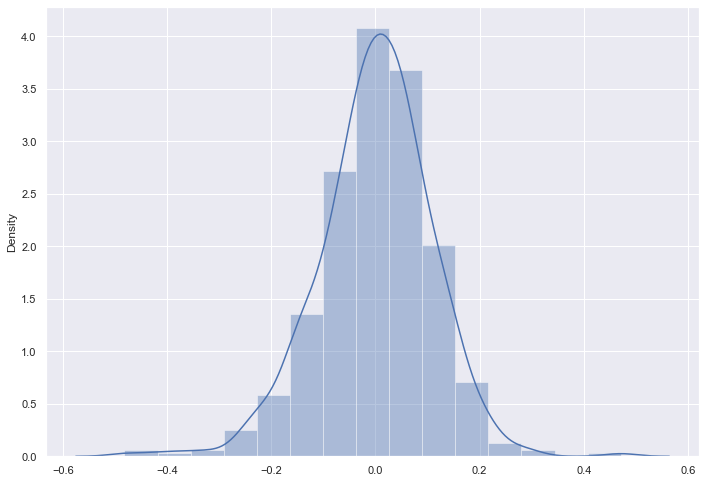

In [217]:
# Plotting the residuals in a displot
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)


#### Inference:
    - Error terms follow the normal distribution pattern.
    - This is one of the assumptions of Linear Regression

In [218]:
# Printing the VIF Values
print(vif)

     Features   VIF
2   windspeed  4.00
1  workingday  3.29
3      spring  2.00
4      summer  2.00
0          yr  1.88
5      winter  1.73
6         mon  1.56
8  mist_cloud  1.56
9         Sep  1.18
7  light_rain  1.08


#### Inference: 
      There is only small multicolinearity between the dependant and independant variables.

In [219]:
# Calculating the r2 Value
r2 = r2_score(y_true=y_train, y_pred = y_train_pred)

In [220]:
r2

0.7673945103443616

#### Inference
The r2 value is 0.7673

In [143]:
# making the final predictions with Test models

In [221]:
# Doing the same transformation on Test Models that we have performed earlier on Training dataset.
num_vars = ['cnt','hum','windspeed','temp','atemp']
# on Test models, we will do just transform and not fit and transform
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test

In [222]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   workingday  510 non-null    int64  
 2   windspeed   510 non-null    float64
 3   spring      510 non-null    uint8  
 4   summer      510 non-null    uint8  
 5   winter      510 non-null    uint8  
 6   mon         510 non-null    uint8  
 7   light_rain  510 non-null    uint8  
 8   mist_cloud  510 non-null    uint8  
 9   Sep         510 non-null    uint8  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 19.4 KB


In [223]:
# Taking the columns based on which we arrived at the model from training datasets
test_col = X_train_rfe.columns

In [224]:
# Filtering the test data sets based on the columns of the model prepared from Training datasets
X_test = X_test[test_col]

In [225]:
X_test_with_constant = sm.add_constant(X_test)

In [226]:
#Predicting the value of cnt based on the test data set
y_test_pred = lr6.predict(X_test_with_constant)

In [227]:
# Predicting the r2 value of Test Data Set
r2 = r2_score(y_true=y_test, y_pred = y_test_pred)

In [228]:
r2

0.7581247333210068

#### Inference:
    The r2 value on the test model is 0.758 which is pretty good as it means we are able to explain 75.8% of variance data.
    The r2 value on training model is 0.767. The r2 value between the test and training sets are very high and comparable. So the model that we have arrived is good

In [229]:

equation_params = pd.DataFrame(lr6.params)
equation_params.insert(0,'independant_vars',equation_params.index)
equation_params.rename(columns = {0:'coeff_value'},inplace = True)
equation_params['index'] = list(range(0,11))
equation_params.sort_values(by = 'coeff_value',ascending = False,inplace = True)
equation_params

,independant_vars,coeff_value,index
const,const,0.529937,0
yr,yr,0.247483,1
Sep,Sep,0.072310,10
mon,mon,0.063799,7
workingday,workingday,0.056292,2
summer,summer,-0.040338,5
winter,winter,-0.074430,6
mist_cloud,mist_cloud,-0.090680,9
windspeed,windspeed,-0.172096,3
spring,spring,-0.296945,4


### Inference: 
   The top 3 variables that are most important for the determination of bike demand are as follows.
   
    -  yr (0.247 coefficient)
    -  light_rain (-0.30 coefficient)
    -  spring (-0.29 coefficent)
    

The equation of the best fitted line is as below
 -  0.247 * yr + 0.072 *Sep + 0.063 *sat + 0.056 * workingday - 0.040 * summer -0.074 * winter -0.09 * mist_cloud * -  - 0.172 * windspeed  - 0.296 * spring -0.30 * light_rain

Text(0, 0.5, 'y_pred')

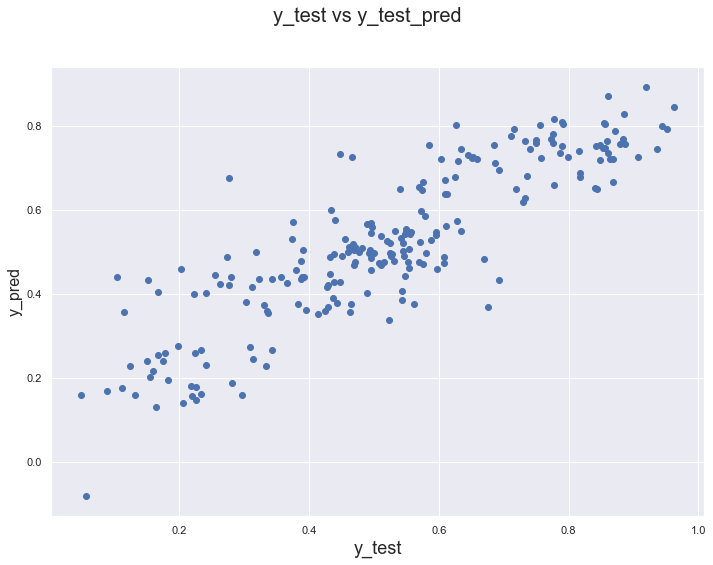

In [231]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     